Connect to BMEG server

In [30]:
import matplotlib.pyplot as plt
import gripql
conn = gripql.Connection("https://bmeg.io/api", credential_file="bmeg_credentials.json")
O = conn.graph("bmeg_rc2")

Do a query that starts on the TCGA BRCA cohort, goes though Cases -> Samples -> Aliquots -> SomaticCallsets -> Alleles.
Once at the alleles, do an aggrigation to count the number of times each chromsome occurs

In [24]:
q = O.query().V("Project:TCGA-BRCA").out("cases").out("samples")
q = q.has(gripql.eq("gdc_attributes.sample_type", "Primary Tumor"))
q = q.out("aliquots").out("somatic_callsets").out("alleles")
q = q.has(gripql.eq("type", "SNP"))
q = q.aggregate(gripql.term("chrom", "chromosome"))
res = list(q)

[INFO]	2019-07-26 18:41:25,205	1 results received in 7 seconds


Visualize the results

<BarContainer object of 24 artists>

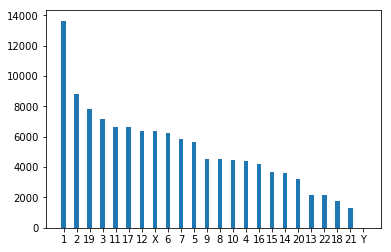

In [31]:
name = []
count = []
for i in res[0].chrom.buckets:
    name.append(i["key"])
    count.append(i["value"])
plt.bar(name, count, width=0.35)